In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('Data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [5]:
data.drop('customerID', axis=1, inplace=True)

In [6]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', '')
data = data.replace(r'^\s*$', np.nan, regex=True)
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [7]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data['SeniorCitizen'] = data['SeniorCitizen'].replace(0, 'No')
data['SeniorCitizen'] = data['SeniorCitizen'].replace(1, 'Yes')

data['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'StreamingMovies',
            'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'PaperlessBilling']

data_services = data.copy()

data_services[services] = data_services[services].replace({'No': 0,
                                                           'Yes': 1,
                                                           'No phone service': 0,
                                                           'Fiber optic': 1,
                                                           'DSL': 1,
                                                           'No internet service': 0})

data['sum_of_services'] = data_services[services].sum(axis=1)

data['sum_of_months'] = data['TotalCharges'] / data['MonthlyCharges']
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,sum_of_services,sum_of_months
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3,1.000000
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,4,33.178227
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,5,2.008357
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4,43.516548
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,3,2.144979


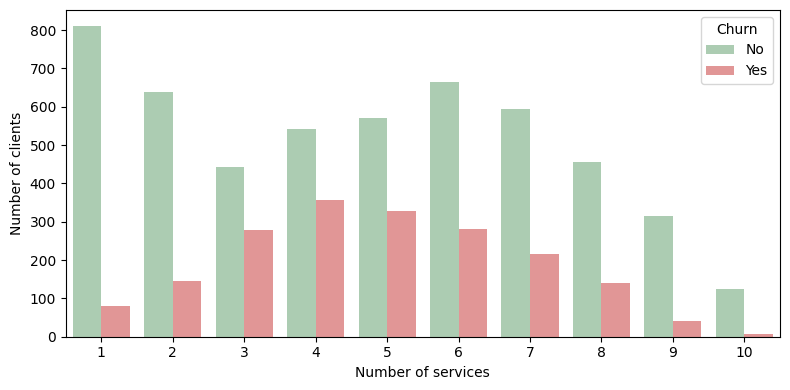

In [11]:
plt.figure(figsize=[8, 4])

sns.countplot(data=data,
              x='sum_of_services',
              hue='Churn',
              palette=['#a7d1ae', '#ed8a8a'])
plt.xlabel('Number of services')
plt.ylabel('Number of clients')

plt.tight_layout()
plt.show()

In [12]:
data_dist = data.copy()
data_dist.drop(['tenure', 'MonthlyCharges', 'TotalCharges',
                'sum_of_months', 'sum_of_services'],
                axis=1, inplace=True)

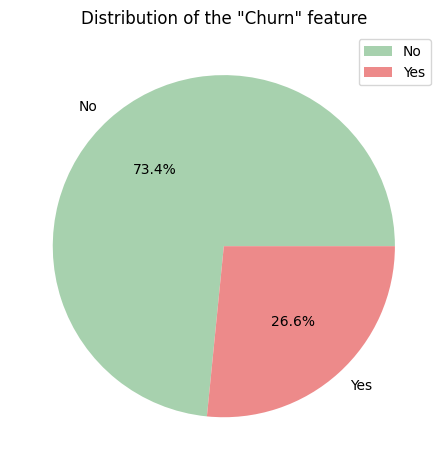

In [31]:
plt.pie(data_dist['Churn'].value_counts(),
        autopct='%1.1f%%',
        labels=data_dist['Churn'].unique(),
        colors=['#a7d1ae', '#ed8a8a'])

plt.title('Distribution of the "Churn" feature')
plt.legend()
plt.tight_layout()
plt.show()

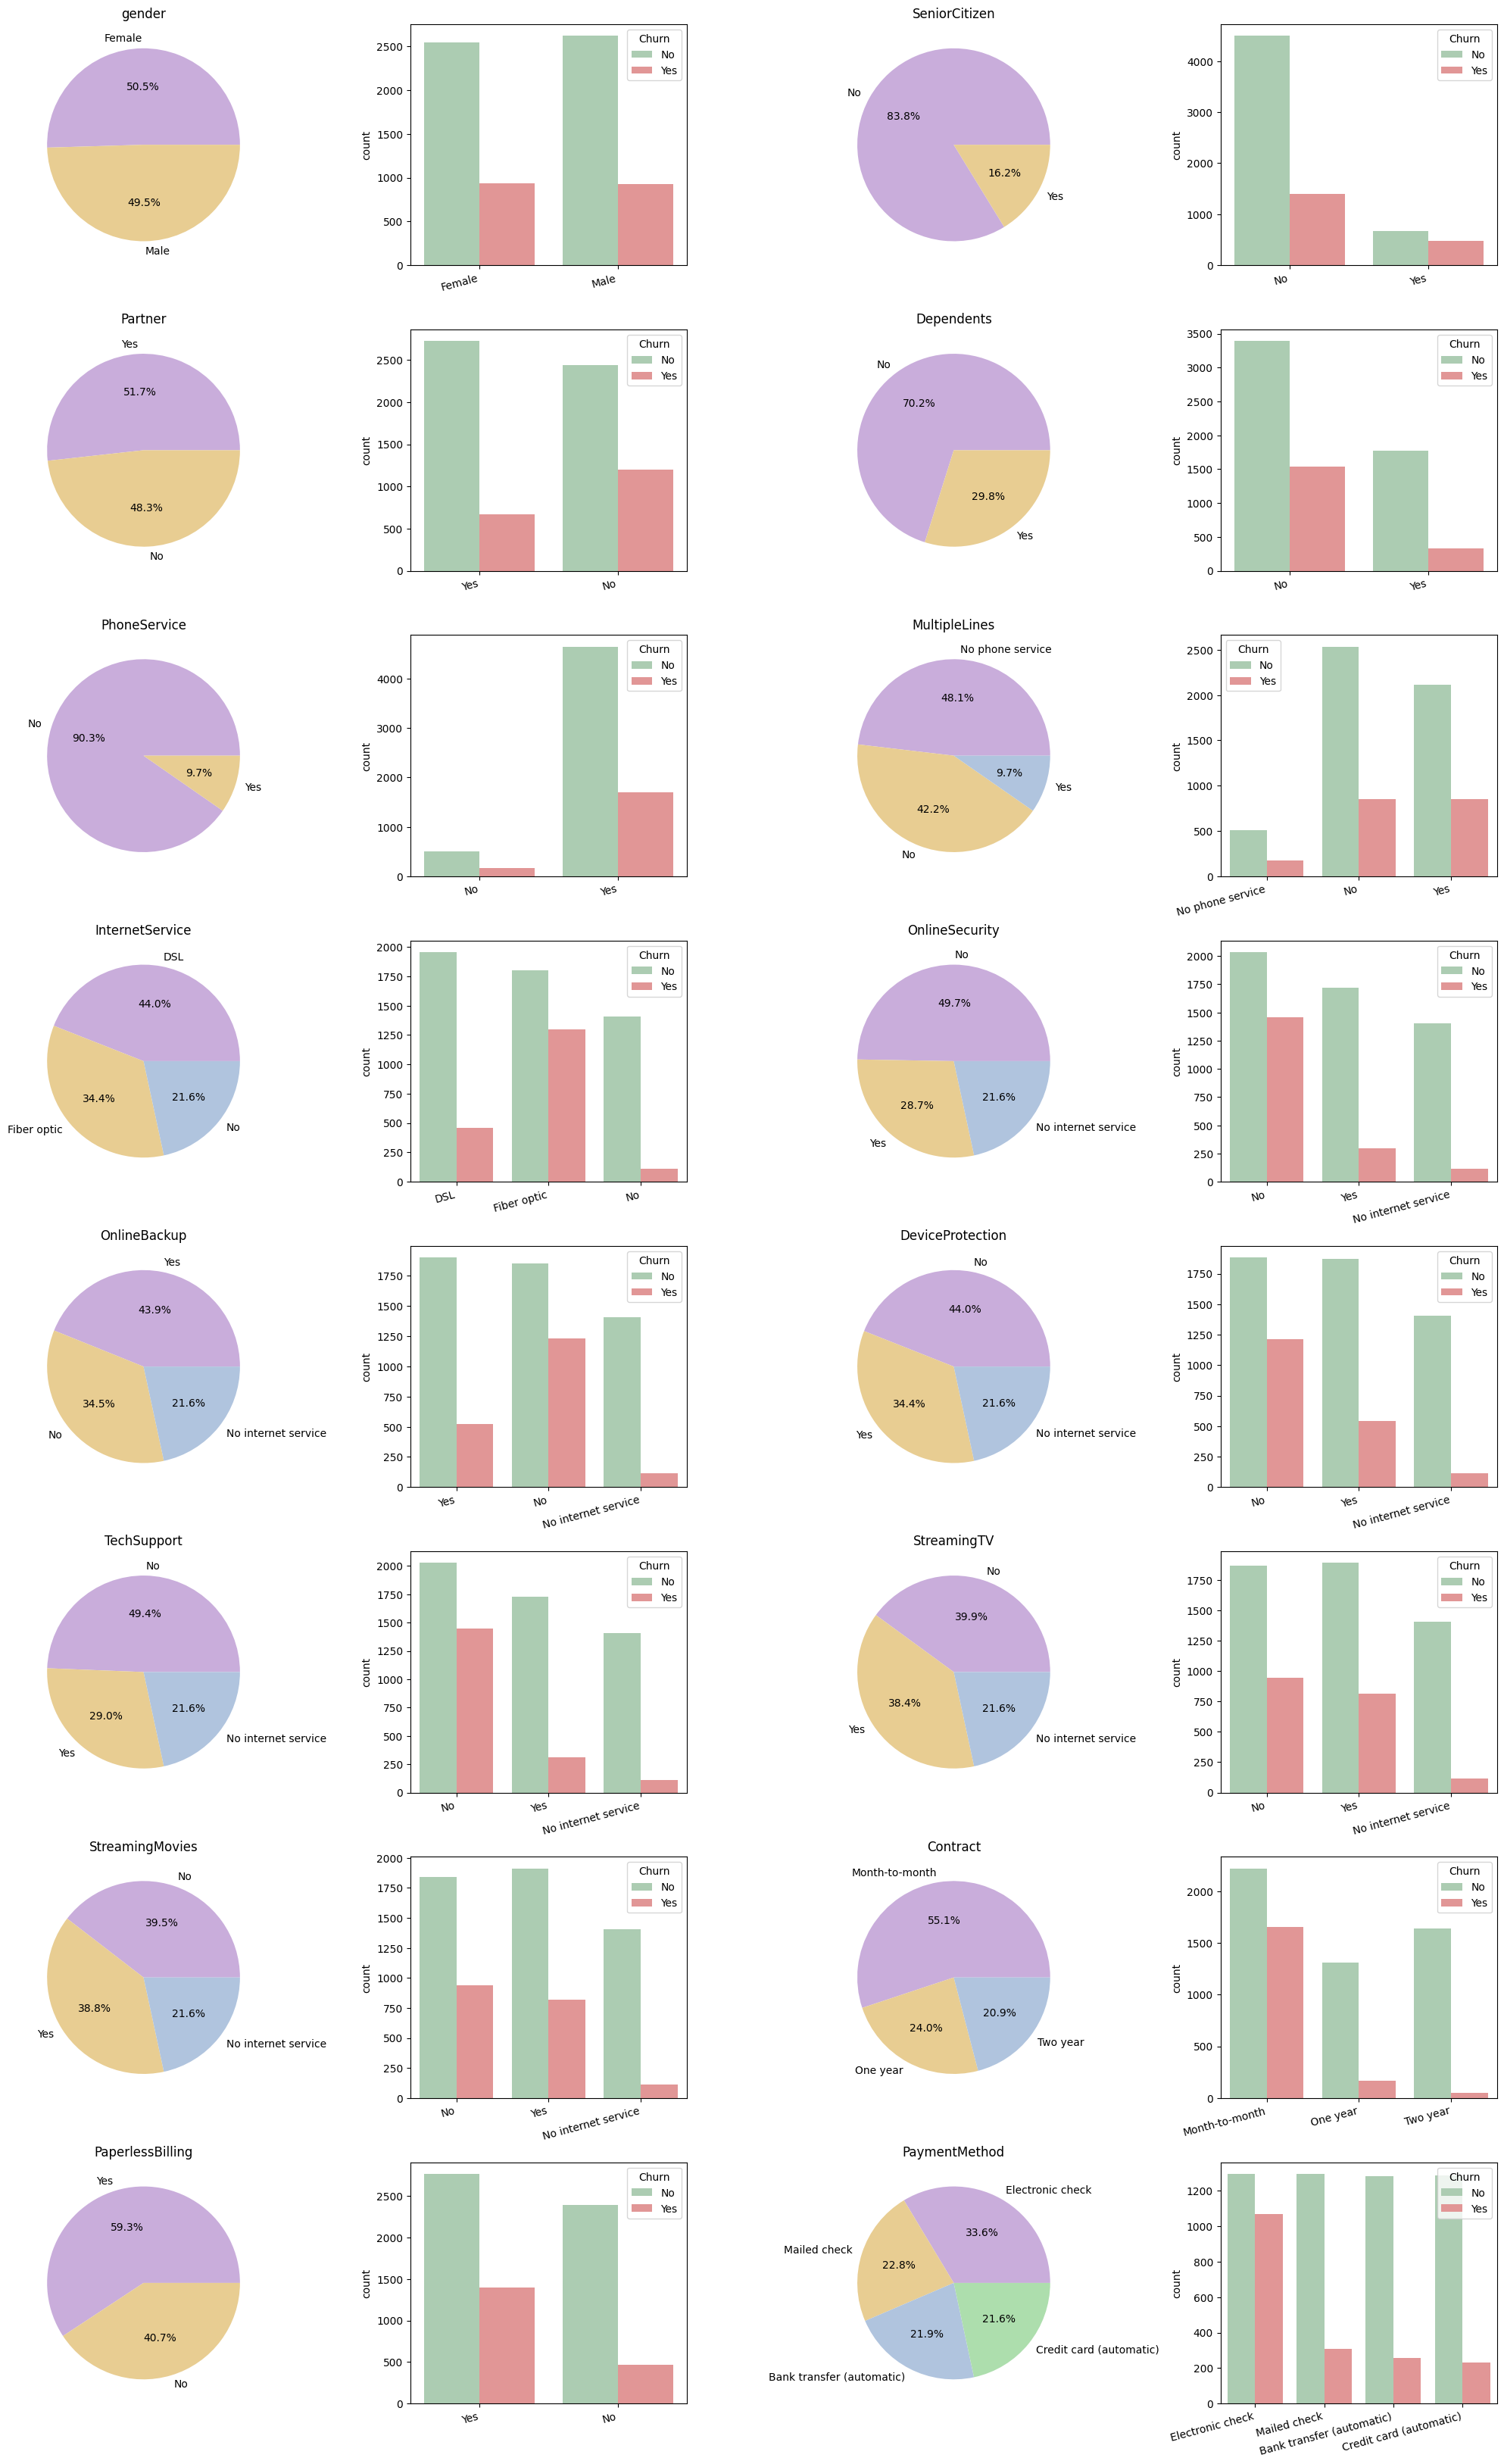

In [14]:
plt.figure(figsize=(20, 40))

for i, col in enumerate(data_dist.iloc[:, :-1]):
    plt.subplot(10, 4, i*2+1)

    plt.title(col)
    plt.pie(data_dist[col].value_counts(),
            autopct='%1.1f%%', labels=data_dist[col].unique(),
            colors=['#c9addb', '#e8cd92', '#B0C4DE', '#addead'])

    plt.subplot(10, 4, i*2+2)
    sns.countplot(data=data_dist,
                  x=col,
                  hue='Churn',
                  palette=['#a7d1ae', '#ed8a8a'])
    plt.xticks(rotation=15, ha='right')
    plt.xlabel('')

plt.tight_layout()
plt.show()

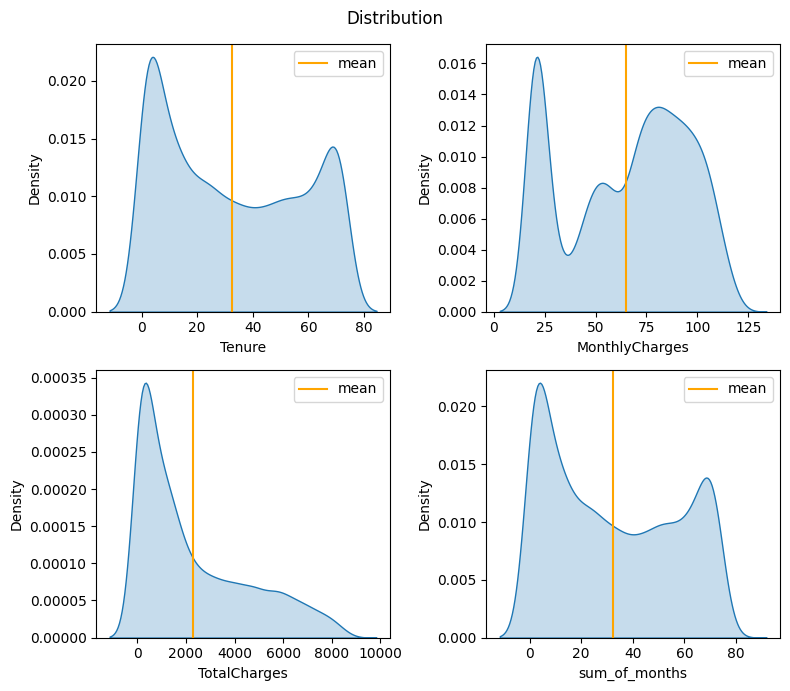

In [15]:
plt.figure(figsize=[8, 7])
plt.suptitle('Distribution')

plt.subplot(2, 2, 1)
sns.kdeplot(data['tenure'], fill=True)
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.axvline(data['tenure'].mean(), label='mean', c='orange')
plt.legend()

plt.subplot(2, 2, 2)
sns.kdeplot(data['MonthlyCharges'], fill=True)
plt.xlabel('MonthlyCharges')
plt.ylabel('Density')
plt.axvline(data['MonthlyCharges'].mean(), label='mean', c='orange')
plt.legend()

plt.subplot(2, 2, 3)
sns.kdeplot(data['TotalCharges'], fill=True)
plt.xlabel('TotalCharges')
plt.ylabel('Density')
plt.axvline(data['TotalCharges'].mean(), label='mean', c='orange')
plt.legend()

plt.subplot(2, 2, 4)
sns.kdeplot(data['sum_of_months'], fill=True)
plt.xlabel('sum_of_months')
plt.ylabel('Density')
plt.axvline(data['sum_of_months'].mean(), label='mean', c='orange')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
X = data.drop('Churn', axis=1)
y = data['Churn'].replace({'No': 0, 'Yes': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
data = data.drop(categorical_features, axis=1)
data = pd.concat([data.reset_index(drop=True), encoded_features_df.reset_index(drop=True)], axis=1)

In [19]:
X = data.drop('Churn', axis=1)
y = data['Churn'].replace({'No': 0, 'Yes': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
RFC_model = RandomForestClassifier(n_estimators=100, random_state=42)
RFC_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = RFC_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7853080568720379
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.63      0.47      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.77      2110



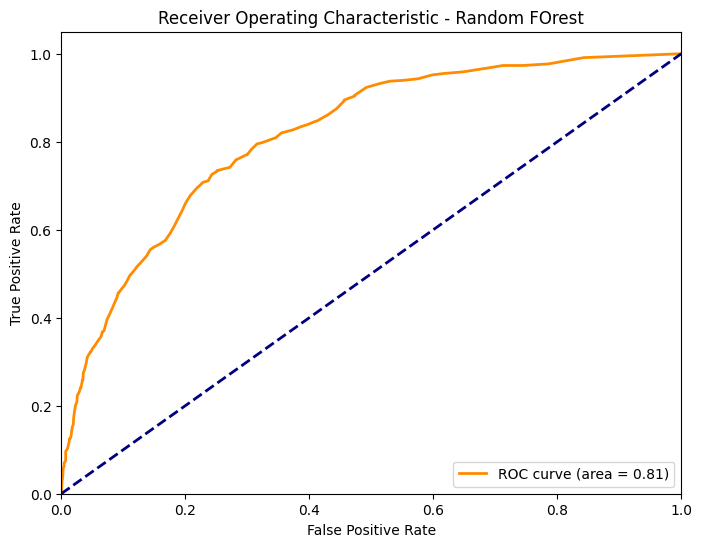

In [27]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, RFC_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random FOrest')
plt.legend(loc="lower right")
plt.show()

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy:', accuracy_svm)
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.785781990521327
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1549
           1       0.66      0.40      0.50       561

    accuracy                           0.79      2110
   macro avg       0.73      0.66      0.68      2110
weighted avg       0.77      0.79      0.77      2110



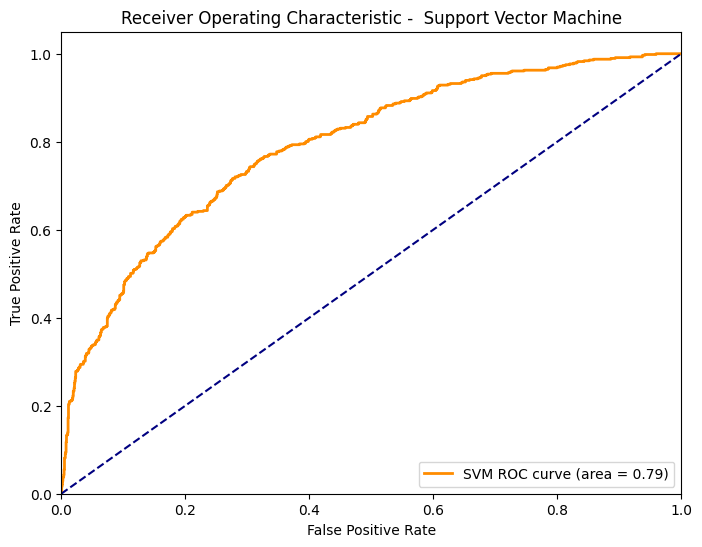

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the decision function scores
y_scores_svm = svm_model.decision_function(X_test)

# Compute ROC curve and ROC area
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic -  Support Vector Machine')
plt.legend(loc="lower right")
plt.show()


In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('KNN Accuracy:', accuracy_knn)
print(classification_report(y_test, y_pred_knn))

c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KNN Accuracy: 0.7734597156398104
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.60      0.45      0.52       561

    accuracy                           0.77      2110
   macro avg       0.71      0.67      0.68      2110
weighted avg       0.76      0.77      0.76      2110



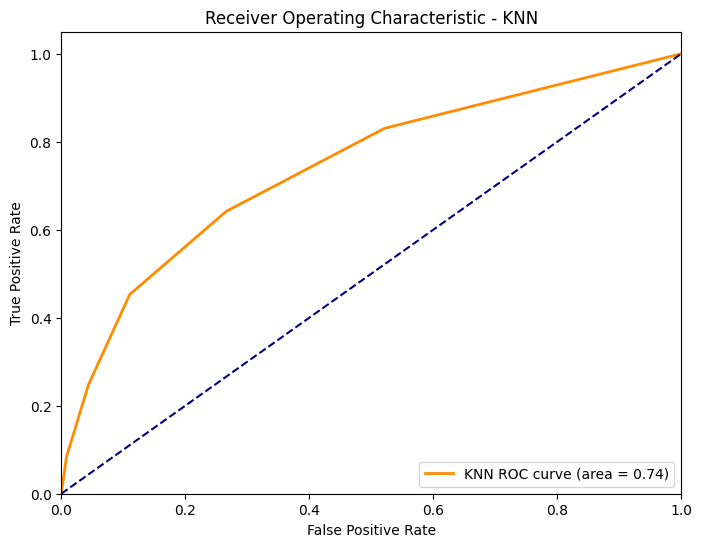

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs_knn = knn_model.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'KNN ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()
